# Clustering methods

L'objectif de ce TP est d'appliquer des méthodes de regroupement hiérarchique et de K-means sur des jeux de données synthéthiques. Ainsi, on analysera l'influence des hyperparamètres et les approches pour déterminer le nombre optimal de clusters.

## Start with clustering 

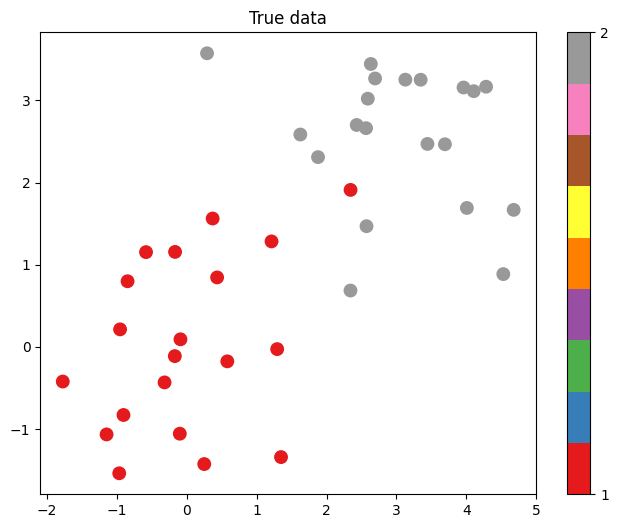

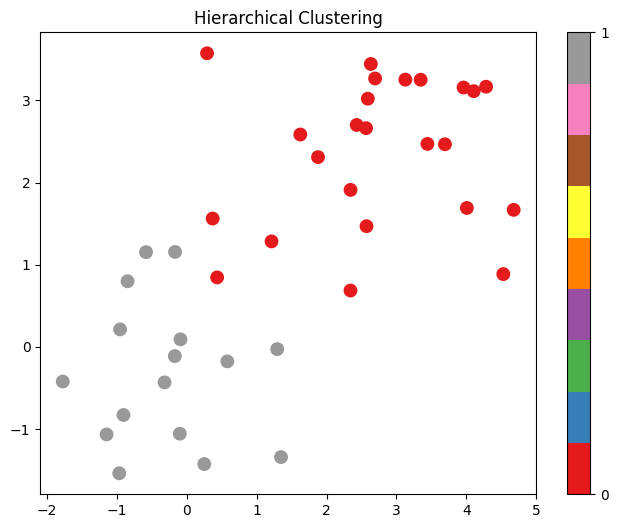

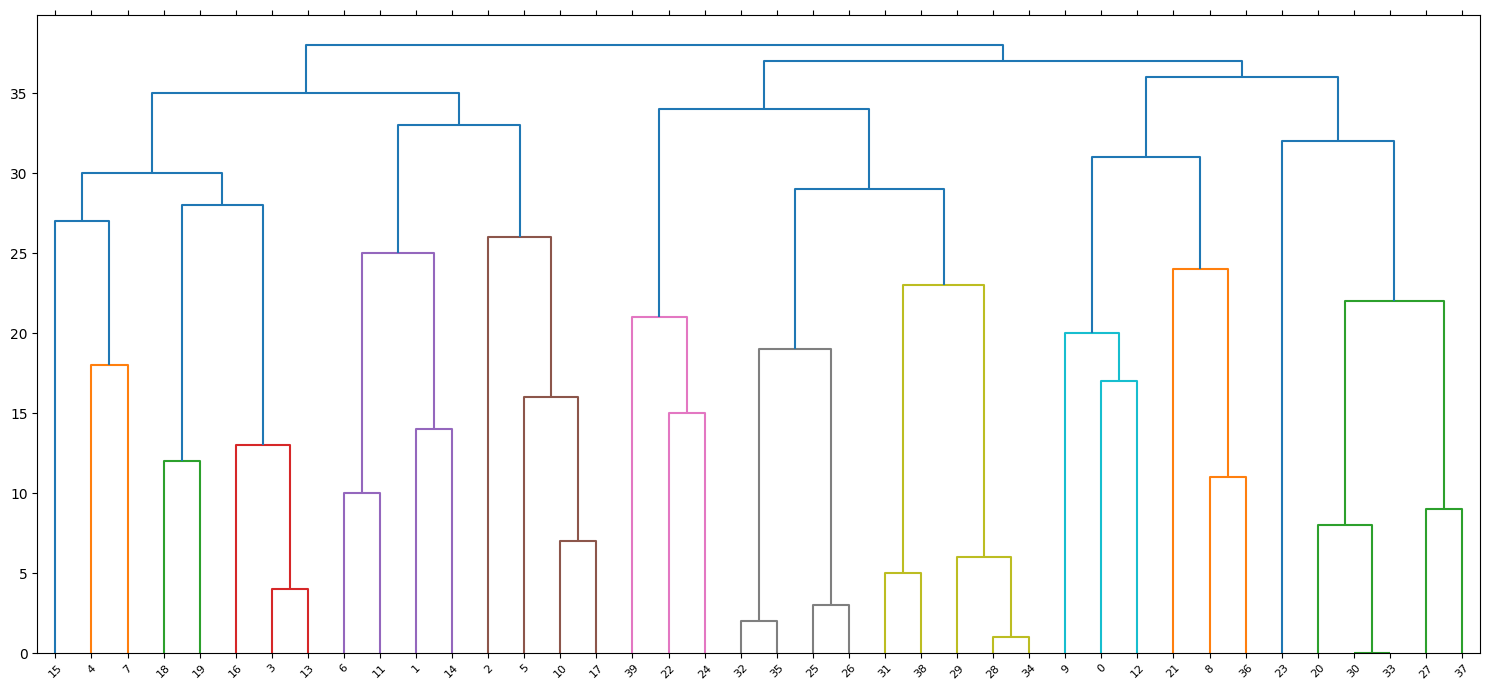

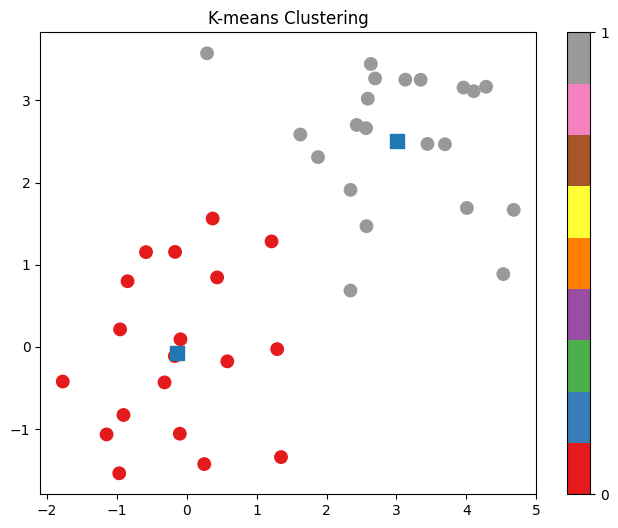

<Figure size 640x480 with 0 Axes>

In [3]:
%matplotlib inline
%run starter_clustering.py

### Clustering hiérarchique 

Le **clustering hiérarchique** organise les données sous forme d'une hiérarchie ou d'un arbre (le dendogramme).  

Agglomératif (bottom-up):
1) Chaque xi est initialement son propre cluster.
2) A chaque étape, les deux clusters les plus proches sont fusionnées.
3) On répète jusqu'à obtenir le nombre de clusters souhaités ou jusqu'à ce qu'il ne reste qu'un cluster unique.

Divisif (top-down):
1) Tous les points sont rassemblés dans un seul cluster.
2) On divise progressivement les clusters jusqu'à obtenir le nombre de clusters souhaité.

Linkage methods (critères pour fusionner les clusters):
- ward: fusionne les clusters pour minimiser la variance à l'intérieur de chaque cluster 
=> clusters compacts, sphériques, très stable.  
- complete: fusion basée sur la distance maximale entre les points des clusters; évite l'enchaînement, peut séparer les agrégats allongés.  
- average: fusion basée sur la distance moyenne entre les points des clusters; compromis entre simple et complet.  
- single: fusion basée sur la distance minimale entre les points des clusters; peut produire un effet d'enchaînement (longs clusters reliant les points un à un).

### K-means

Le **K-means** est une méthode de partitionnement.
1) Choisir K centres initiaux.
2) Assigner chaque point au cluster le plus proche (selon la distance euclidienne).
3) Recalculer les centres des clusters comme moyenne des points assignés.
4) Répéter les étapes 2/3 jusqu'à convergence (cad que les clusters ne changent plus/très peu).

### Comparaison K-means & clustering hiérarchique 

| Critère                | **K-Means**                     | **Hiérarchique**                           |
|------------------------|----------------------------------|---------------------------------------------|
| K fixé au départ   | Oui                              | Non                                         |
| Structure          | 1 seule partition                | Hiérarchie complète (dendrogramme)          |
| Distance           | Euclidienne (souvent)            | Choix du linkage (Ward, complete, etc.)    |
| Forme des clusters | Sphériques                       | Varie selon le linkage                      |
| Complexité         | Rapide                           | Plus lent                                   |
| Sensible aux outliers | Oui                           | Oui mais impact différent                   |


## Selecting the number of clusters 

In [11]:
# scipy.io pour les fichiers .mat
import scipy.io as sio

# sio.loadmat renvoie un dictionnaire
# on sélectionne la variable "george" => X: tableau contenant la matrice george
X = sio.loadmat("./george.mat")["george"]

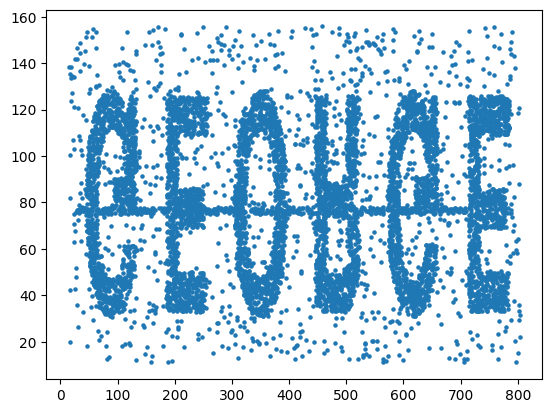

In [18]:
# affichage des données
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0], X[:,1], s=5)
plt.show()

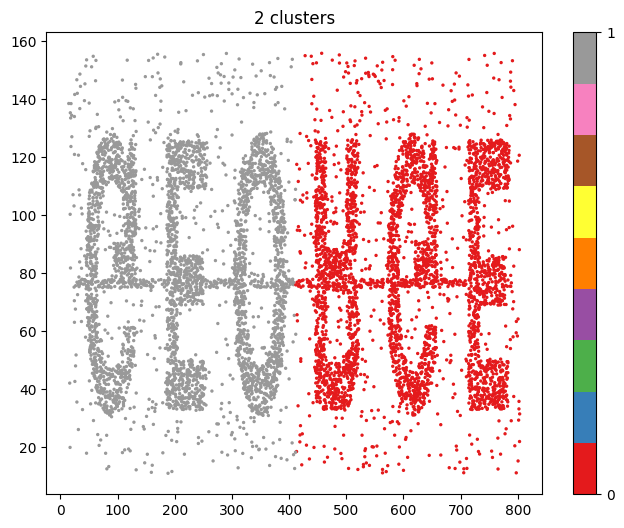

In [32]:
# nombre de clusters
K = 2

# K-means clustering method
# par défaut, les centres sont initialiés de manière aléatoire (init="random")
# on pourrait faire init="k-means++" pour une initialisation intelligence des centres
# initiaux pour être bien espacés
model = cluster.KMeans(n_clusters=K, init="k-means++")

# fit: le modèle apprend les clusters à partir des données 
# calcule les centres de clusters et assigne chaque point à son cluster le plus proche
# predict: retourne les indices de chaque cluster pour chaque point
# => retourne un tableau de taille n_samples; chaque élément indique le cluster du point xi
assigned_cluster = model.fit_predict(X)

plot_clusters(X, assigned_cluster, title=f"{K} clusters", symbolsize=2)

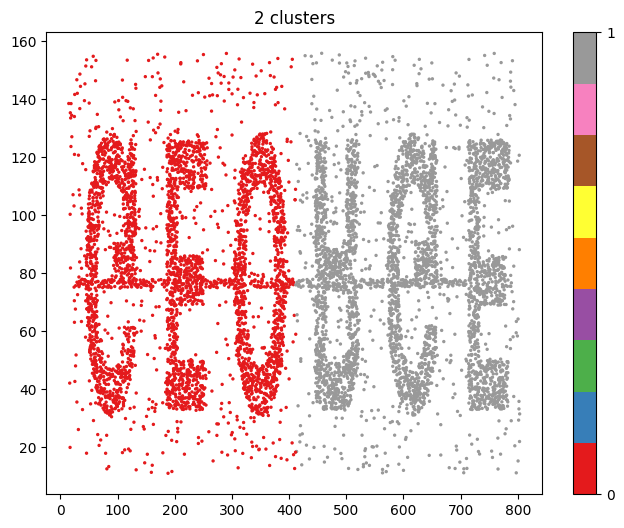

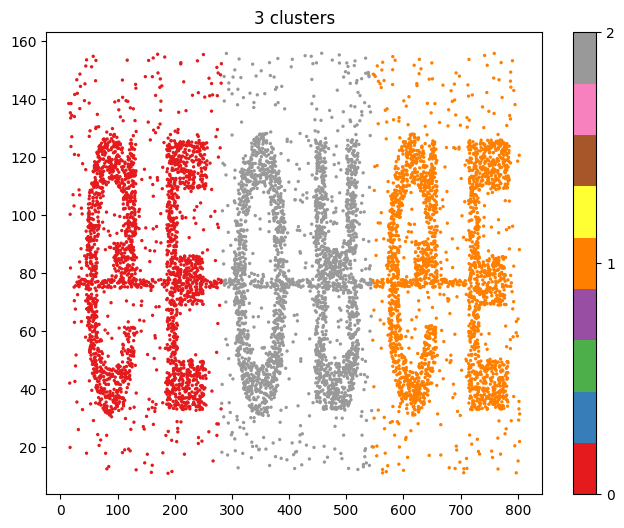

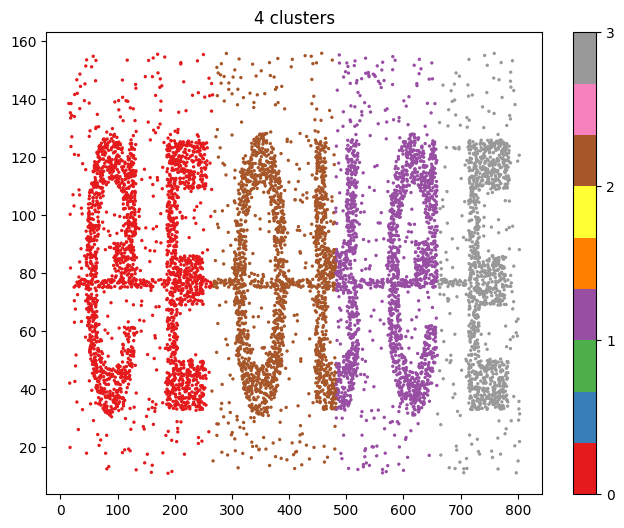

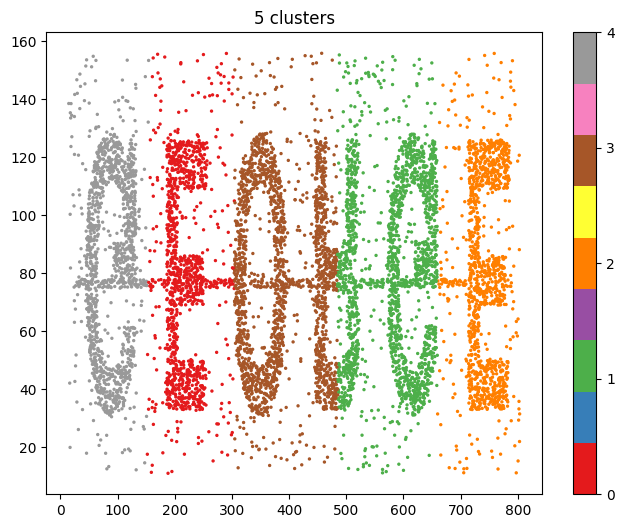

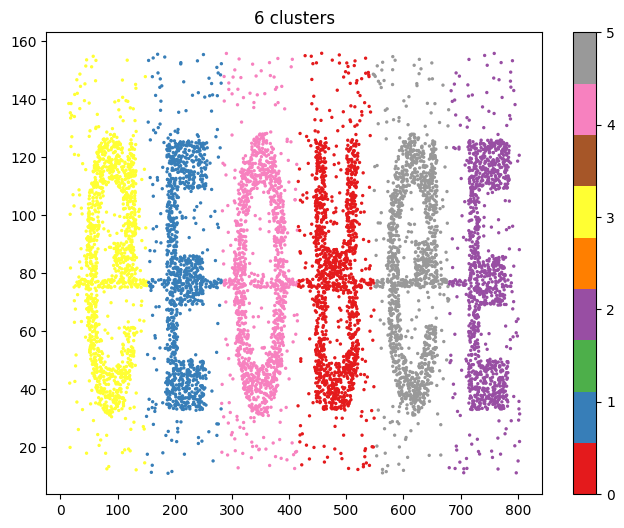

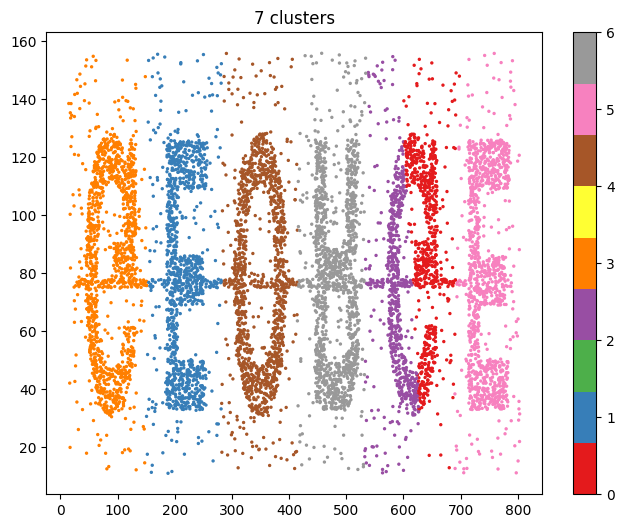

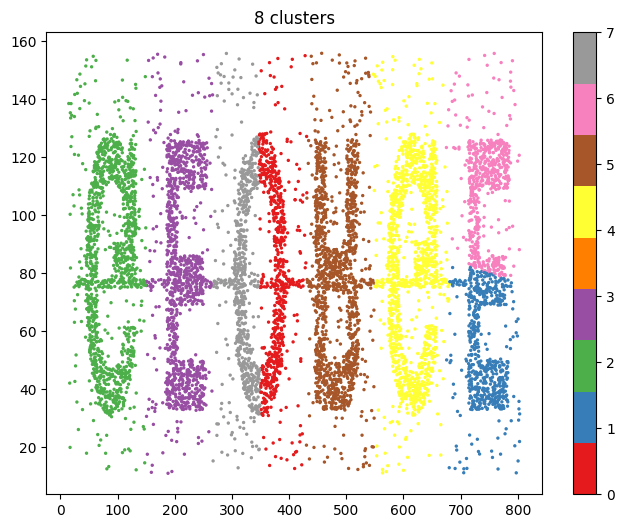

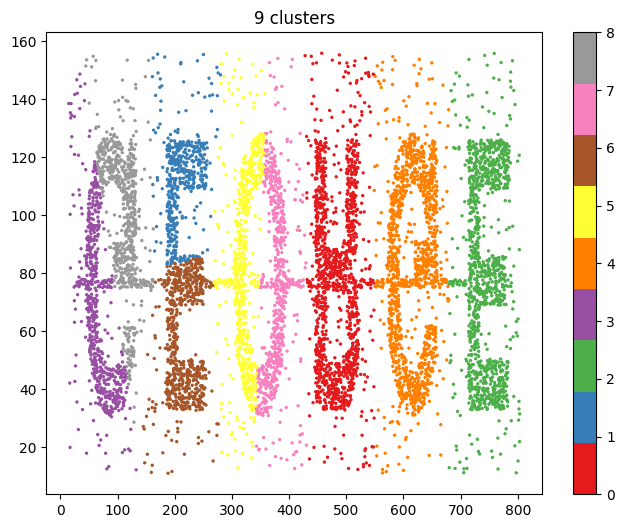

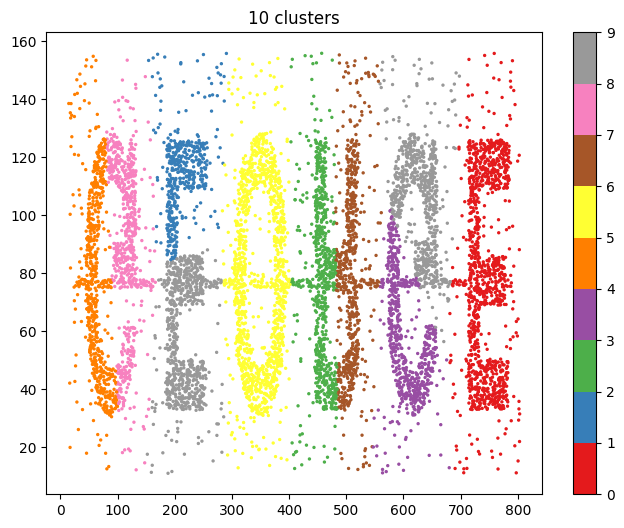

In [36]:
K = [2,3,4,5,6,7,8,9,10]
for i in K:
    model = cluster.KMeans(n_clusters=i, init="k-means++")
    assigned_cluster = model.fit_predict(X)
    plot_clusters(X, assigned_cluster, title=f"{i} clusters", symbolsize=2)

On obtient une séparation en K clusters. Lorsque K=6, un cluster représente une lettre.

L'objectif est de sélectionner le nombre optimal de clusters K. Pour ce faire, on utilise le score de silhouette, défini comme le coefficient de silhouette moyen de tous les échantillons.  
score de silhouette élevé => meilleur clustering.
- proche de 1 => clusters bien séparés et compacts.
- proche de 0 => clusters se chevauchent.

Pour n_clusters= 2, le silhouette score moyen est de 0.612008539591523
Pour n_clusters= 3, le silhouette score moyen est de 0.5809858698046819
Pour n_clusters= 4, le silhouette score moyen est de 0.5070728726733298
Pour n_clusters= 5, le silhouette score moyen est de 0.5051968468914099
Pour n_clusters= 6, le silhouette score moyen est de 0.5517105130024682
Pour n_clusters= 7, le silhouette score moyen est de 0.5109794882453507
Pour n_clusters= 8, le silhouette score moyen est de 0.485366927284988
Pour n_clusters= 9, le silhouette score moyen est de 0.4566085600078269
Pour n_clusters= 10, le silhouette score moyen est de 0.41512482683590257
Pour n_clusters= 11, le silhouette score moyen est de 0.408861506572507


Text(0.5, 1.0, 'Inertia criterion')

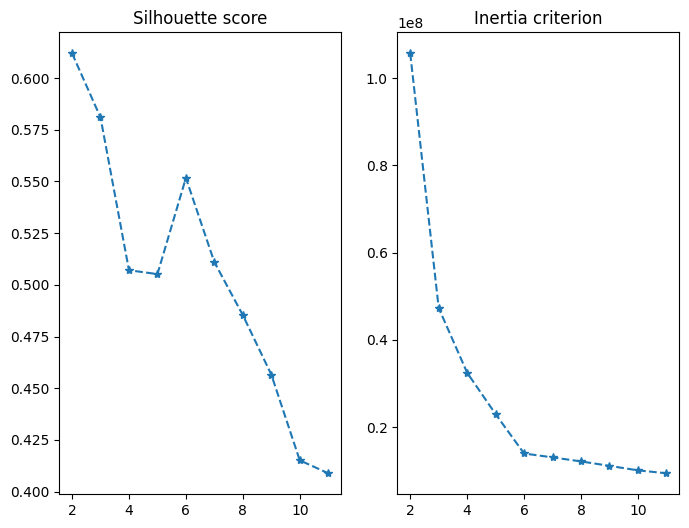

In [43]:
from sklearn.metrics import silhouette_score

vect_n_clusters = np.arange(2,12,1)
silhouette_index = np.empty(vect_n_clusters.shape)
inertia_index = np.empty(vect_n_clusters.shape)

for idx, n_clusters in enumerate(vect_n_clusters):
    model = cluster.KMeans(n_clusters = n_clusters)
    assigned_cluster = model.fit_predict(X)
    # calcule le silhouette score
    silhouette_index[idx] = silhouette_score(X, assigned_cluster)
    # somme des distances au carré entre chaque xi et le centre de son cluster
    # c'est la variance intra_cluster totale que K-means cherche à minimiser
    inertia_index[idx] = model.inertia_
    
    print(f"Pour n_clusters= {n_clusters}, le silhouette score moyen est de {silhouette_index[idx]}")
    
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.plot(vect_n_clusters, silhouette_index, "*--")
plt.title("Silhouette score")
plt.subplot(122)
plt.plot(vect_n_clusters, inertia_index, "*--")
plt.title("Inertia criterion")

Inertie (méthode du "Elbow"): correspond à la somme des distances au carré entre chaque xi et le centre de son cluster. On cherche un "coude" dans la courbe du plot, celui-ci indiquant le point à partir duquel l'ajout de clusters supplémentaires n'apporte plus de gain significatif.  
Le choix optimal de K repose sur un compromis entre ces deux critères: il s'agit de sélectionner la valeur de K qui maximise le silhouette score tout en se situant danss la zone ou l'intertie se stabilise.  
Ici, K=6 semble être un très bon compromis, il est d'ailleurs cohérent à la structure réelle des données qu'on a pu observer: chaque cluser correspond à une lettre.

## Image segmentation

Les dimensions de l'image sont: 627 lignes, 837 colonnes and 3 canaux (RGB)


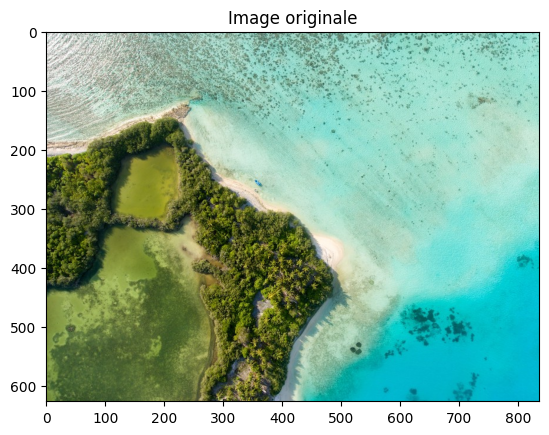

In [51]:
img = plt.imread("seaforest_small.jpeg")
n, m, d = img.shape
print(f"Les dimensions de l'image sont: {n} lignes, {m} colonnes and {d} canaux (RGB)")
plt.imshow(np.uint8(img))
plt.title("Image originale");

**vectoriser**: passer d'une structure multi-dimensionnelle à une liste de vecteurs.  
Permet d'appliquer des algorithmes comme K-means qui travaillent sur des vecteurs 2D.

Dans l'image originale, chaque pixel à 3 canaux pour les 3 couleurs RGB.  
On souhaite clusteriser l'image selon les couleurs donc on va vectoriser l'image en la transformant en matrice 2D (n*m, d):
- chaque ligne de x: un pixel
- chaque colonne de x: un canal couleur

In [53]:
X = np.reshape(img, (n*m, d))
K = 3
kmeans_image = cluster.KMeans(n_clusters=K)
kmeans_image.fit(X)

KMeans(n_clusters=3)

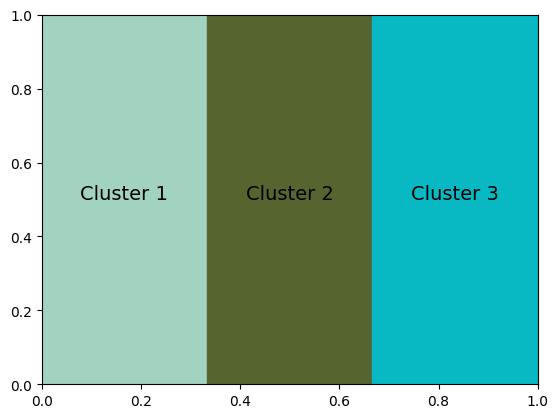

In [54]:
from utility import plot_rectangles_colors
centers = kmeans_image.cluster_centers_
plot_rectangles_colors(centers)

In [61]:
y = kmeans_image.predict(X)
print(y)
# y est un tableau d'indices: chaque pixel ici prend la coucleur du centre de son cluster
Xseg = centers[y]

[0 0 0 ... 2 2 2]


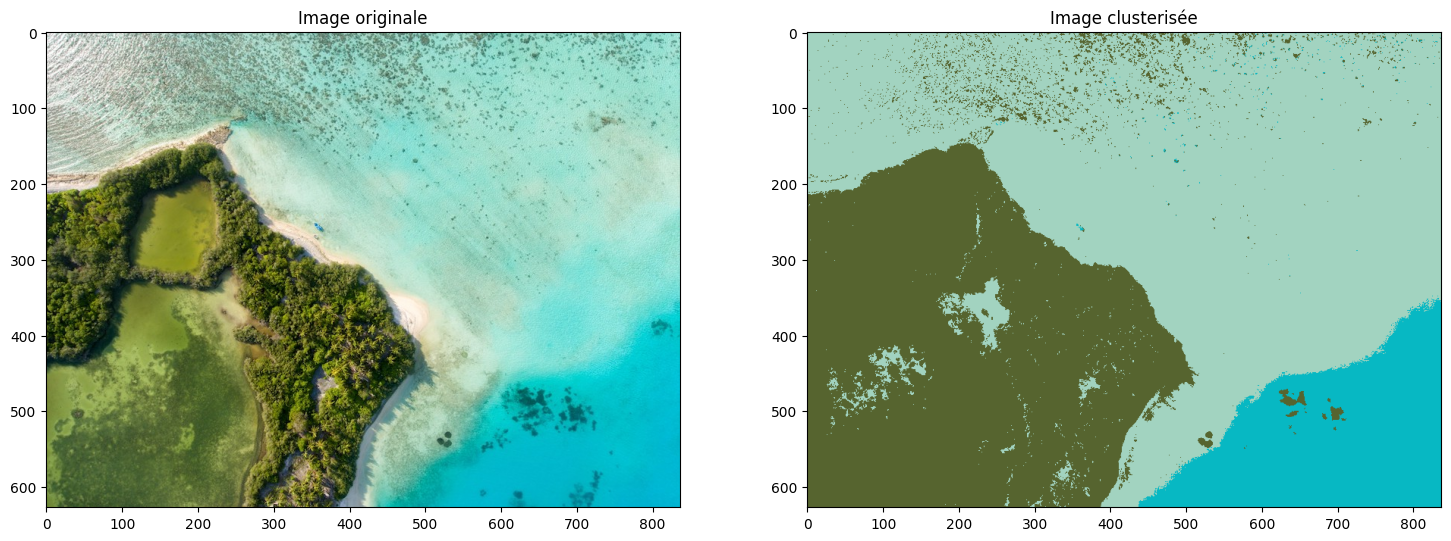

In [62]:
plt.figure(figsize=(18,10))
plt.subplot(121); plt.imshow(np.uint8(img));
plt.title("Image originale")
plt.subplot(122); plt.imshow(np.uint8(Xseg.reshape(n, m, d)));
plt.title("Image clusterisée");

L'image est simplifiée en 3 couleurs dominantes.

## Cluster and visualize digits 

In [68]:
digits = sio.loadmat("uspsasi.mat")
digits, labels = digits["x"], digits["y"][:,0]

In [72]:
from sklearn.cluster import KMeans

In [74]:
K = 10
kmeans_digits = KMeans(n_clusters=K, random_state=42)
# label_clusters contient pour chaque xi le cluster auquel il appartient
labels_clusters = kmeans_digits.fit_predict(X)

On veut visualiser le cluster en 2D mais les données ont une dimension > 2D donc on doit appliquer une méthode de réduction de dimension:
- PCA: linéaire, rapide.
- t-SNE: non-linéaire, plus précise.

### PCA

In [77]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

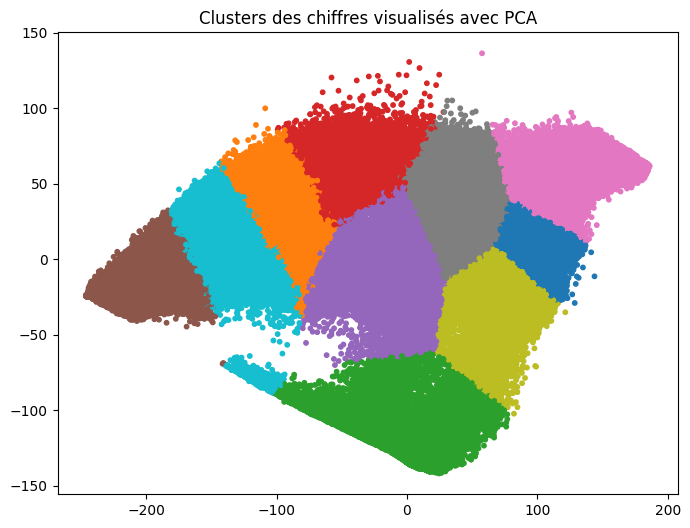

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_clusters, cmap='tab10', s=10)
plt.title("Clusters des chiffres visualisés avec PCA")
plt.show()

### t-SNE

Très très long à tourner, ne pas lancer.

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_clusters, cmap='tab10', s=10)
plt.title("Clusters des chiffres visualisés avec t-SNE")
plt.show()